# Dimanod Price Price Prediction

## Import libs

In [3]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Loading Data

In [4]:
data = pd.read_csv("train.csv")
data_testing=pd.read_csv('test.csv')
data.head()



Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
1           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
2           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
3           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
4           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   

      y     z  
0  3.84  2.31  
1  4.23  2.63  
2  4.35  2.75  
3  3.96  2.48  
4  3.98  2.47

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
data.shape

(43040, 11)

## Cleaning data

In [7]:
#The first column seems to be just index
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()



carat         depth         table         price             x  \
count  43040.000000  43040.000000  43040.000000  43040.000000  43040.000000   
mean       0.796964     61.746080     57.439542   3942.706343      5.724376   
std        0.481455      1.435246      2.240196   4023.534556      1.132496   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.380000     61.000000     56.000000    940.000000      4.660000   
50%        0.710000     61.800000     57.000000   2388.000000      5.710000   
75%        1.030000     62.500000     59.000000   5309.250000      6.500000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  43040.000000  43040.000000  
mean       5.728122      3.534367  
std        1.159641      0.714543  
min        0.000000      0.000000  
25%        4.670000      2.870000  
50%        5.720000      3.530000  
75%        6.500000      4.020000  
max       58.900000     31.800000

In [ ]:
data[data.duplicated(keep=False)]

In [ ]:
#remove duplicate
data = data.drop_duplicates()

In [8]:

#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape



(43023, 10)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ff4f3ecb420> (for post_execute):


KeyboardInterrupt: 

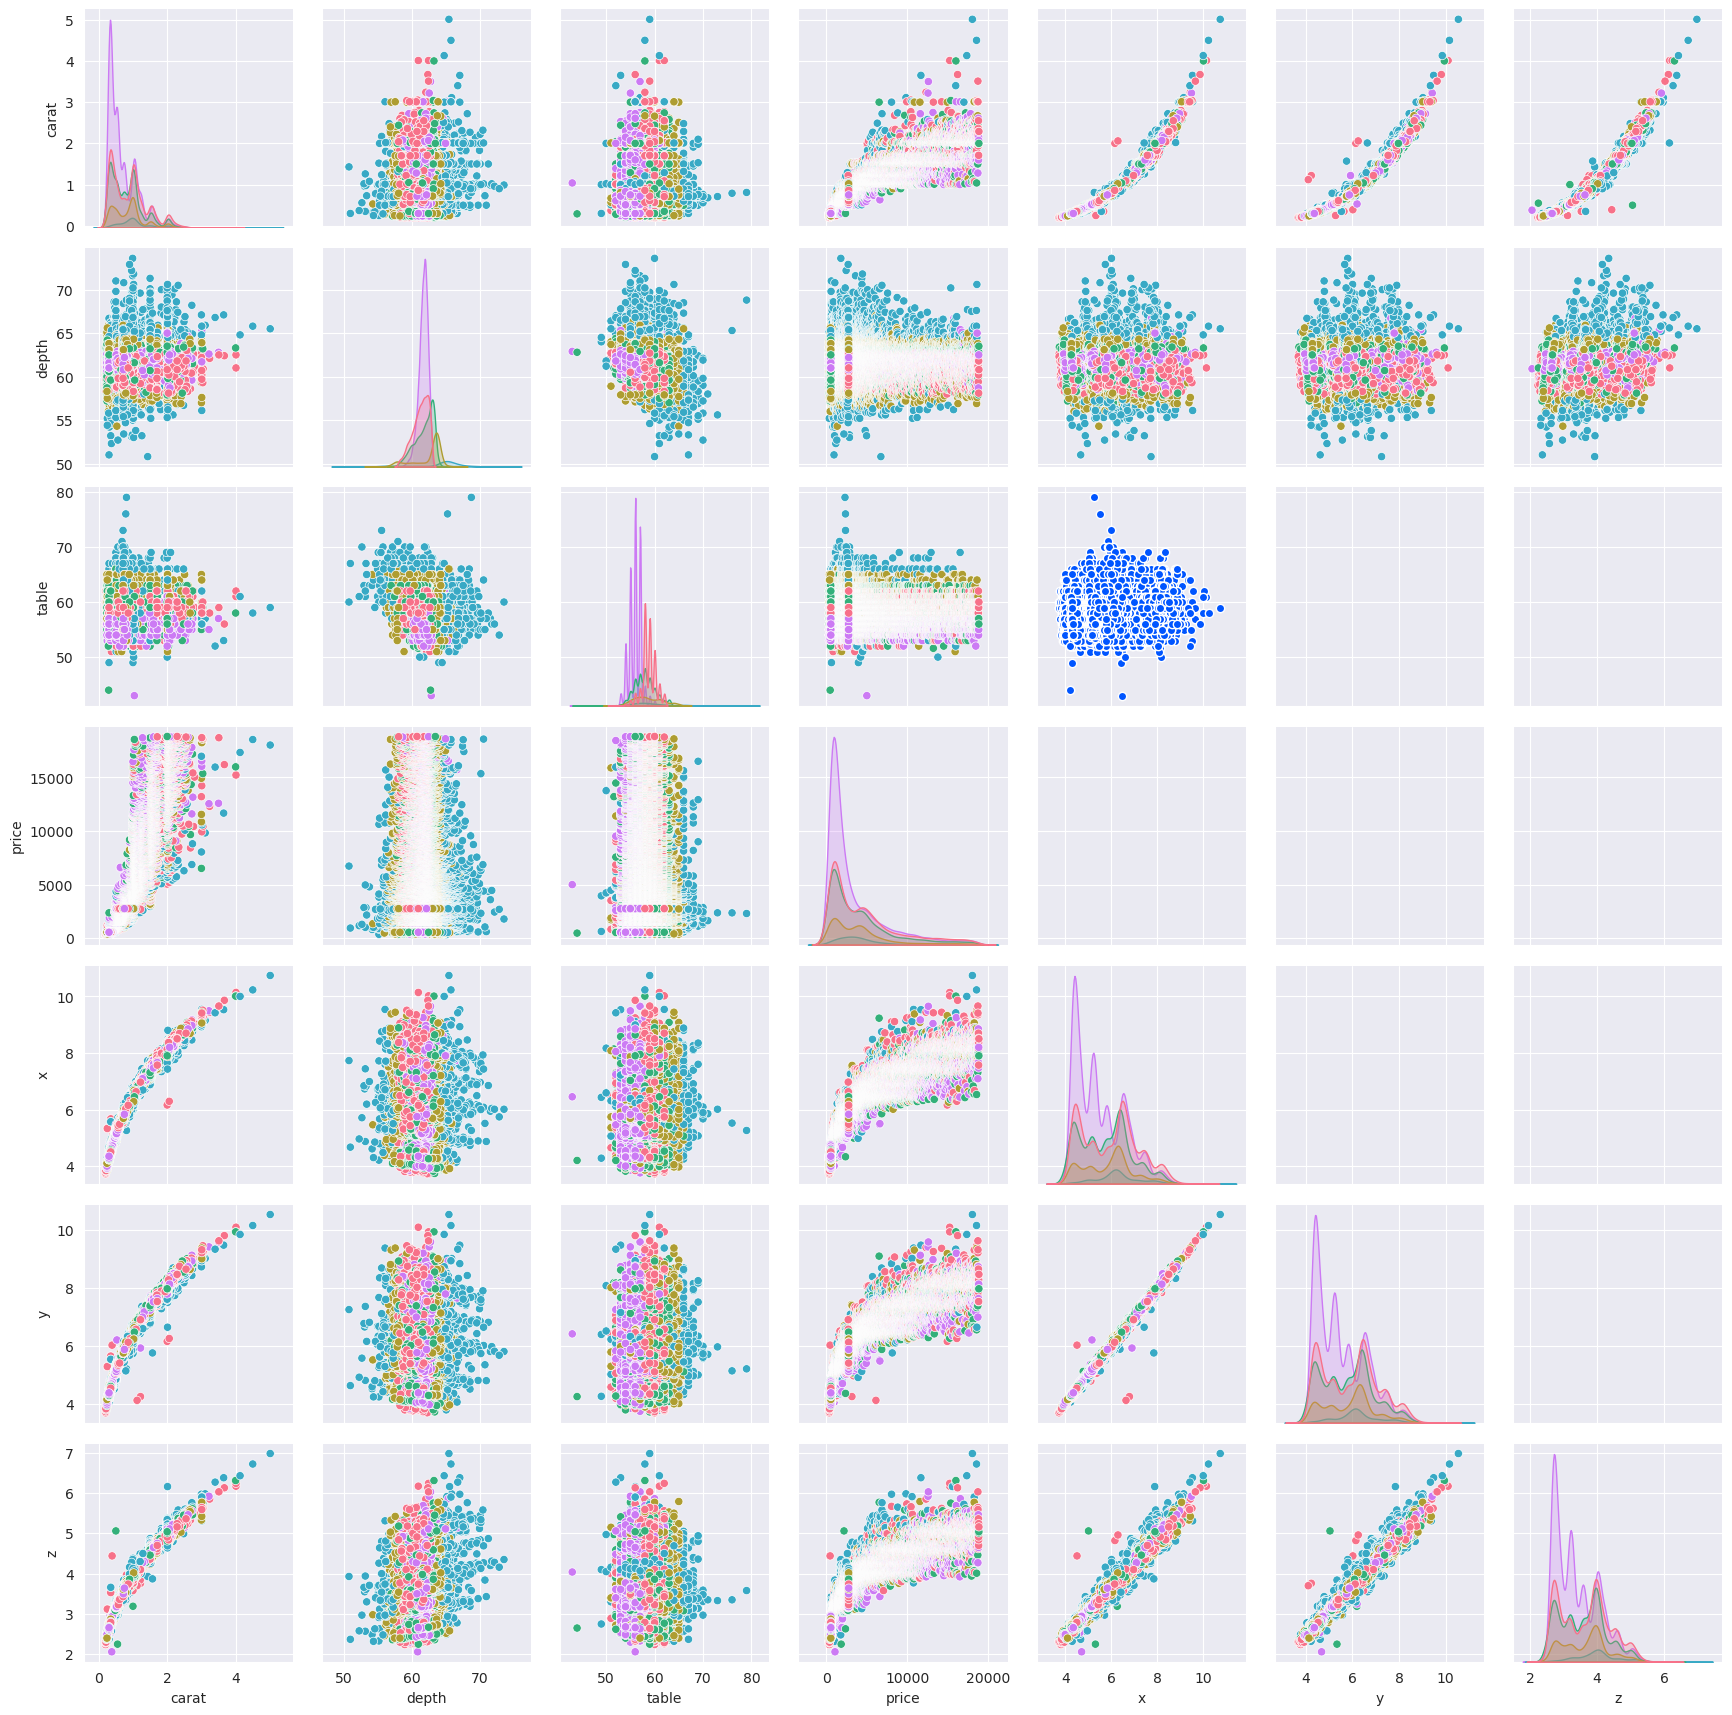

In [16]:
# pairplot to show columns data, outliers...
sns.pairplot(data, hue ='cut')

IndexError: index 3 is out of bounds for axis 0 with size 3

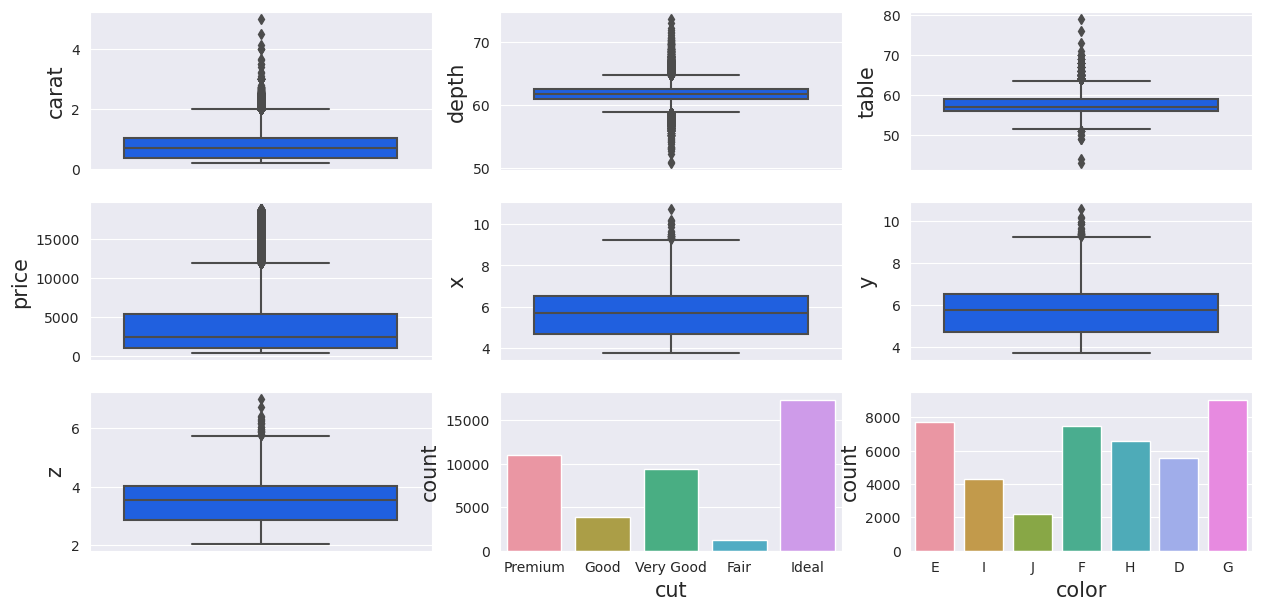

In [40]:
#Code to find the outliers in each column and draw them as graph
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([data.select_dtypes(exclude='object').columns.values,  data.select_dtypes(include='object').columns.values])

num_cols = len(OrderedCols)
num_rows = 3
(num_cols + 2) // 3  # Calculate the number of rows needed for subplots

fig, ax = plt.subplots(num_rows, 3, figsize=(15, 7), dpi=100)

for i, col in enumerate(OrderedCols):
    x = i // 3
    y = i % 3
    if i < num_cols - 1:
        if data[col].dtype == 'object':
            sns.countplot(data=data, x=col, ax=ax[x, y])
            ax[x, y].xaxis.label.set_size(15)
            ax[x, y].yaxis.label.set_size(15)
        else:
            sns.boxplot(data=data, y=col, ax=ax[x, y])
            ax[x, y].yaxis.label.set_size(15)
    else:
        if data[col].dtype == 'object':
            sns.countplot(data=data, x=col, y='price', ax=ax[x, y])
            ax[x, y].xaxis.label.set_size(15)
            ax[x, y].yaxis.label.set_size(15)
        else:
            sns.boxplot(data=data, x=col, y='price', ax=ax[x, y])
            ax[x, y].xaxis.label.set_size(15)
            ax[x, y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

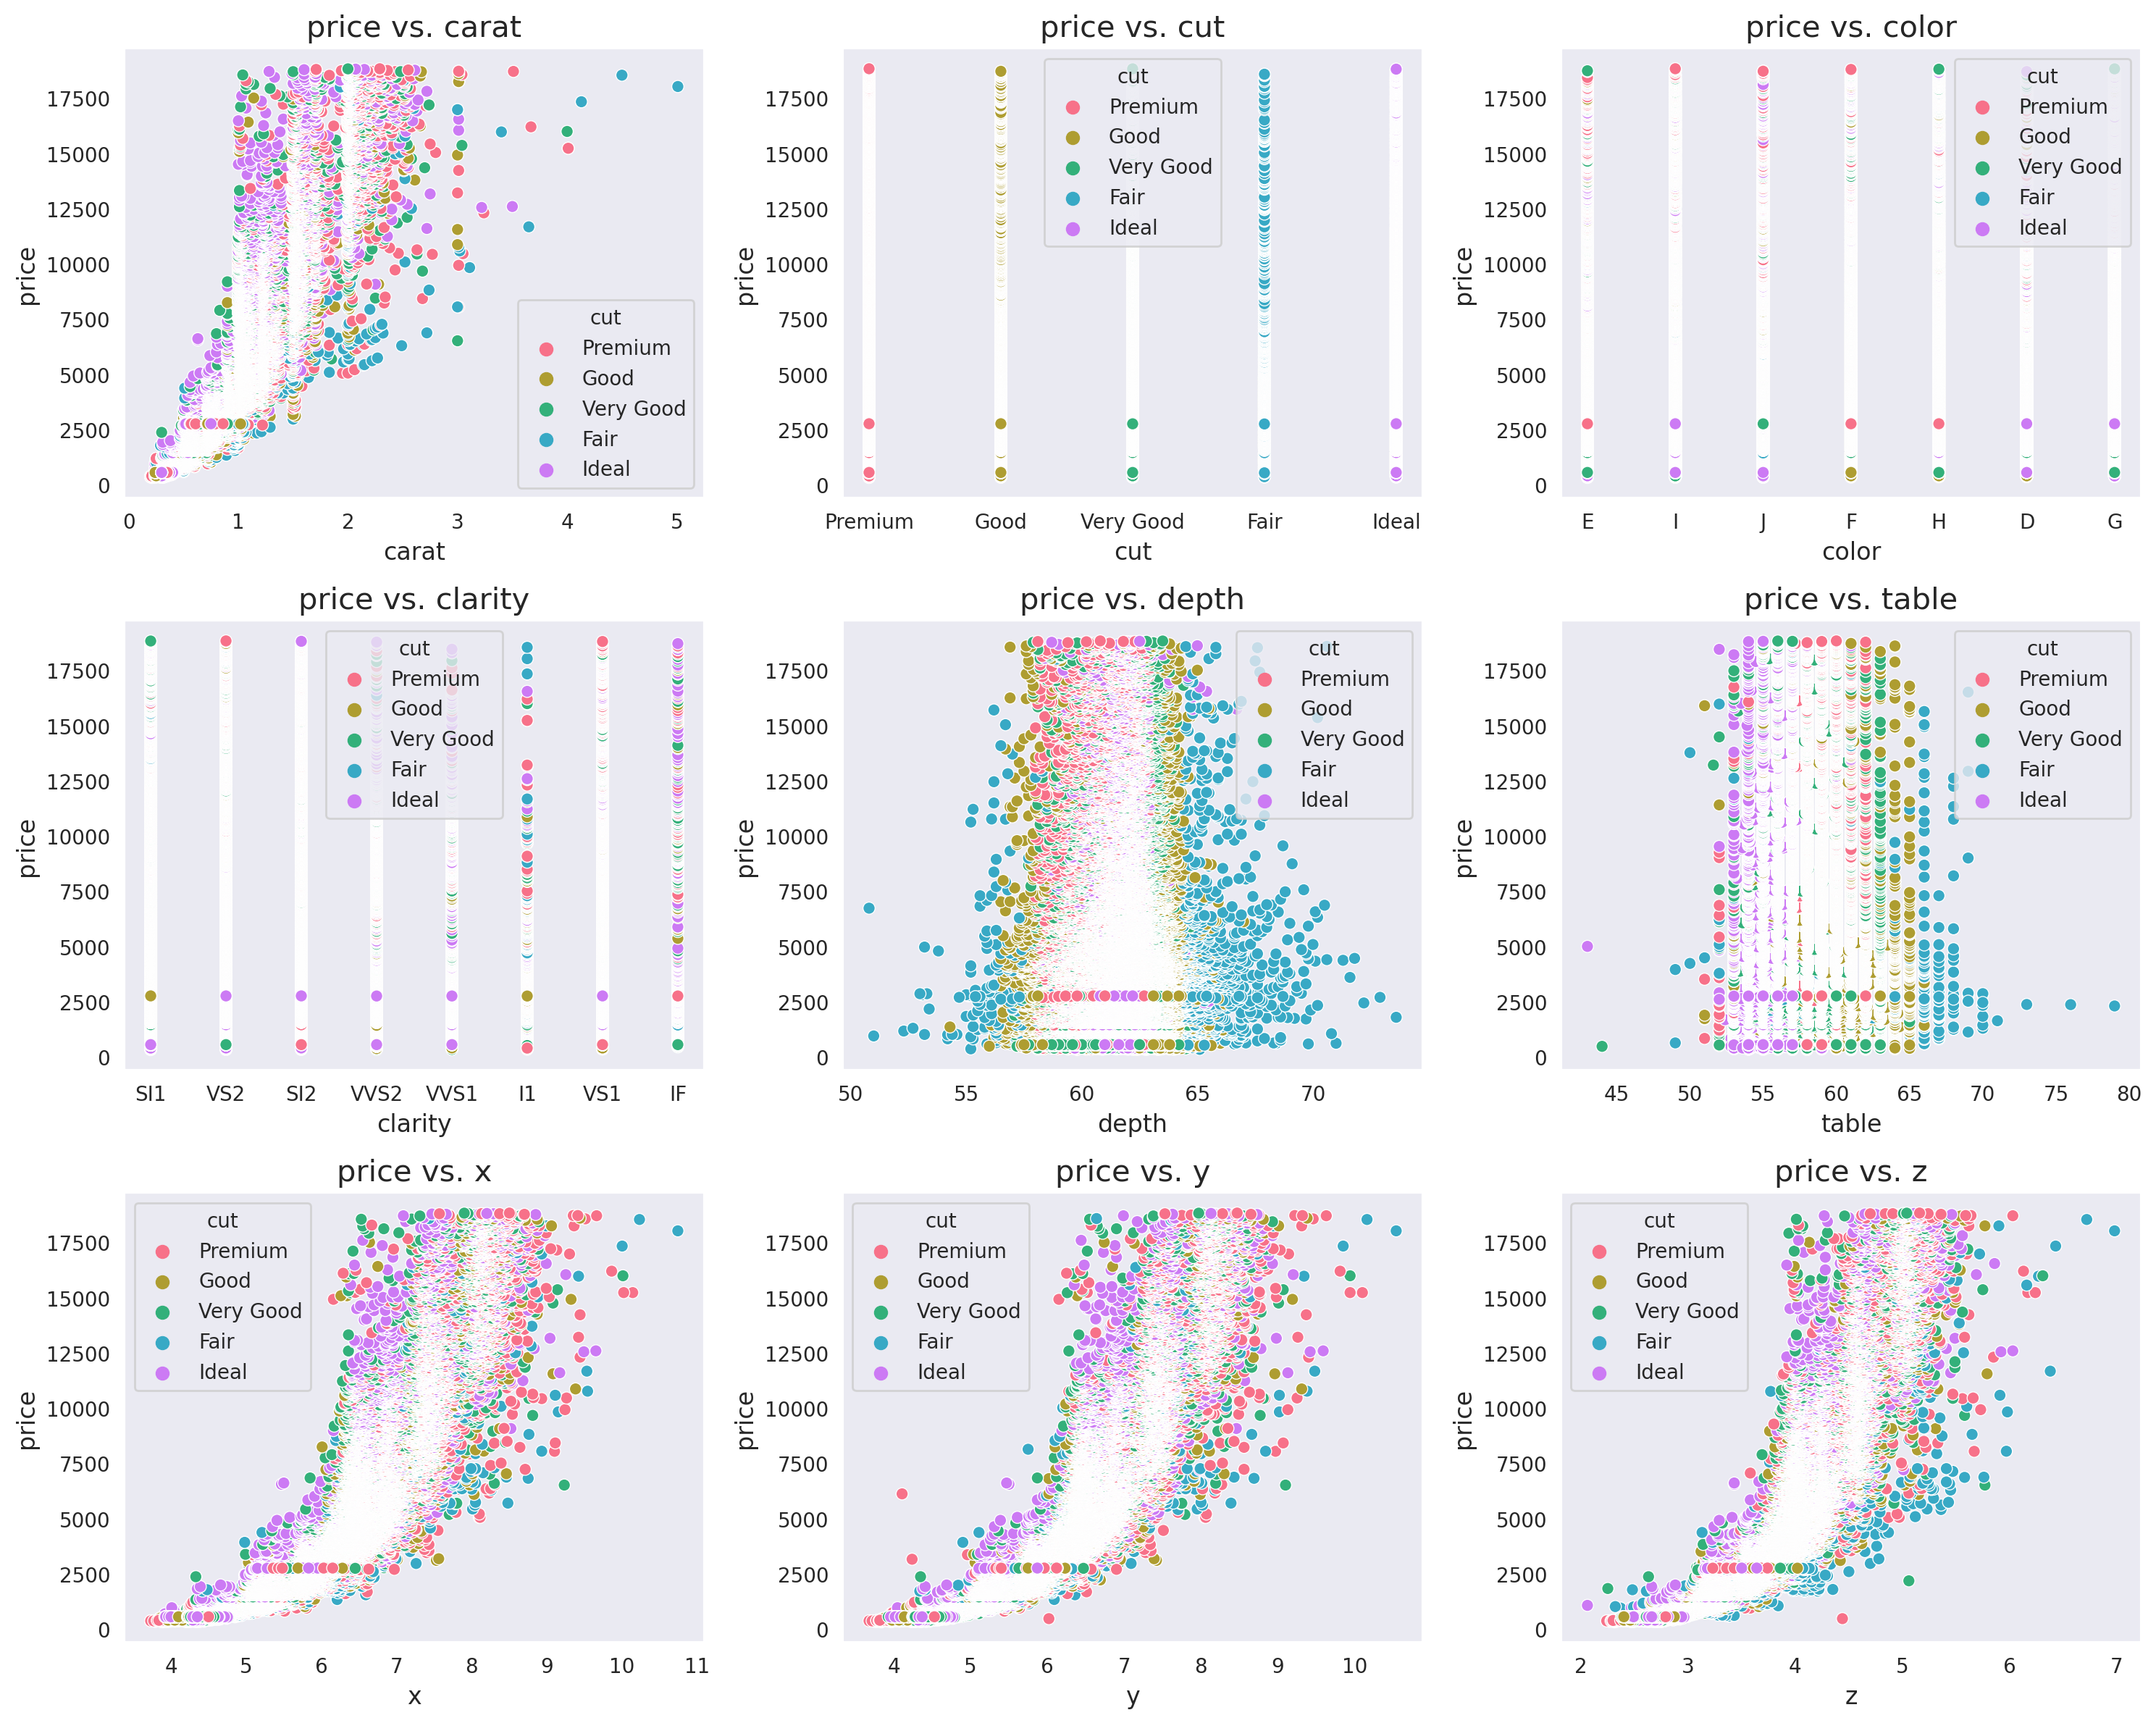

In [36]:

# Plot
target = 'price'
features = data.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=data, x=features[i], y=target, hue='cut', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

# ax[2, 1].axis('off')
# ax[2, 2].axis('off')
plt.tight_layout()
plt.show()



In [9]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(43010, 10)

/home/osama/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


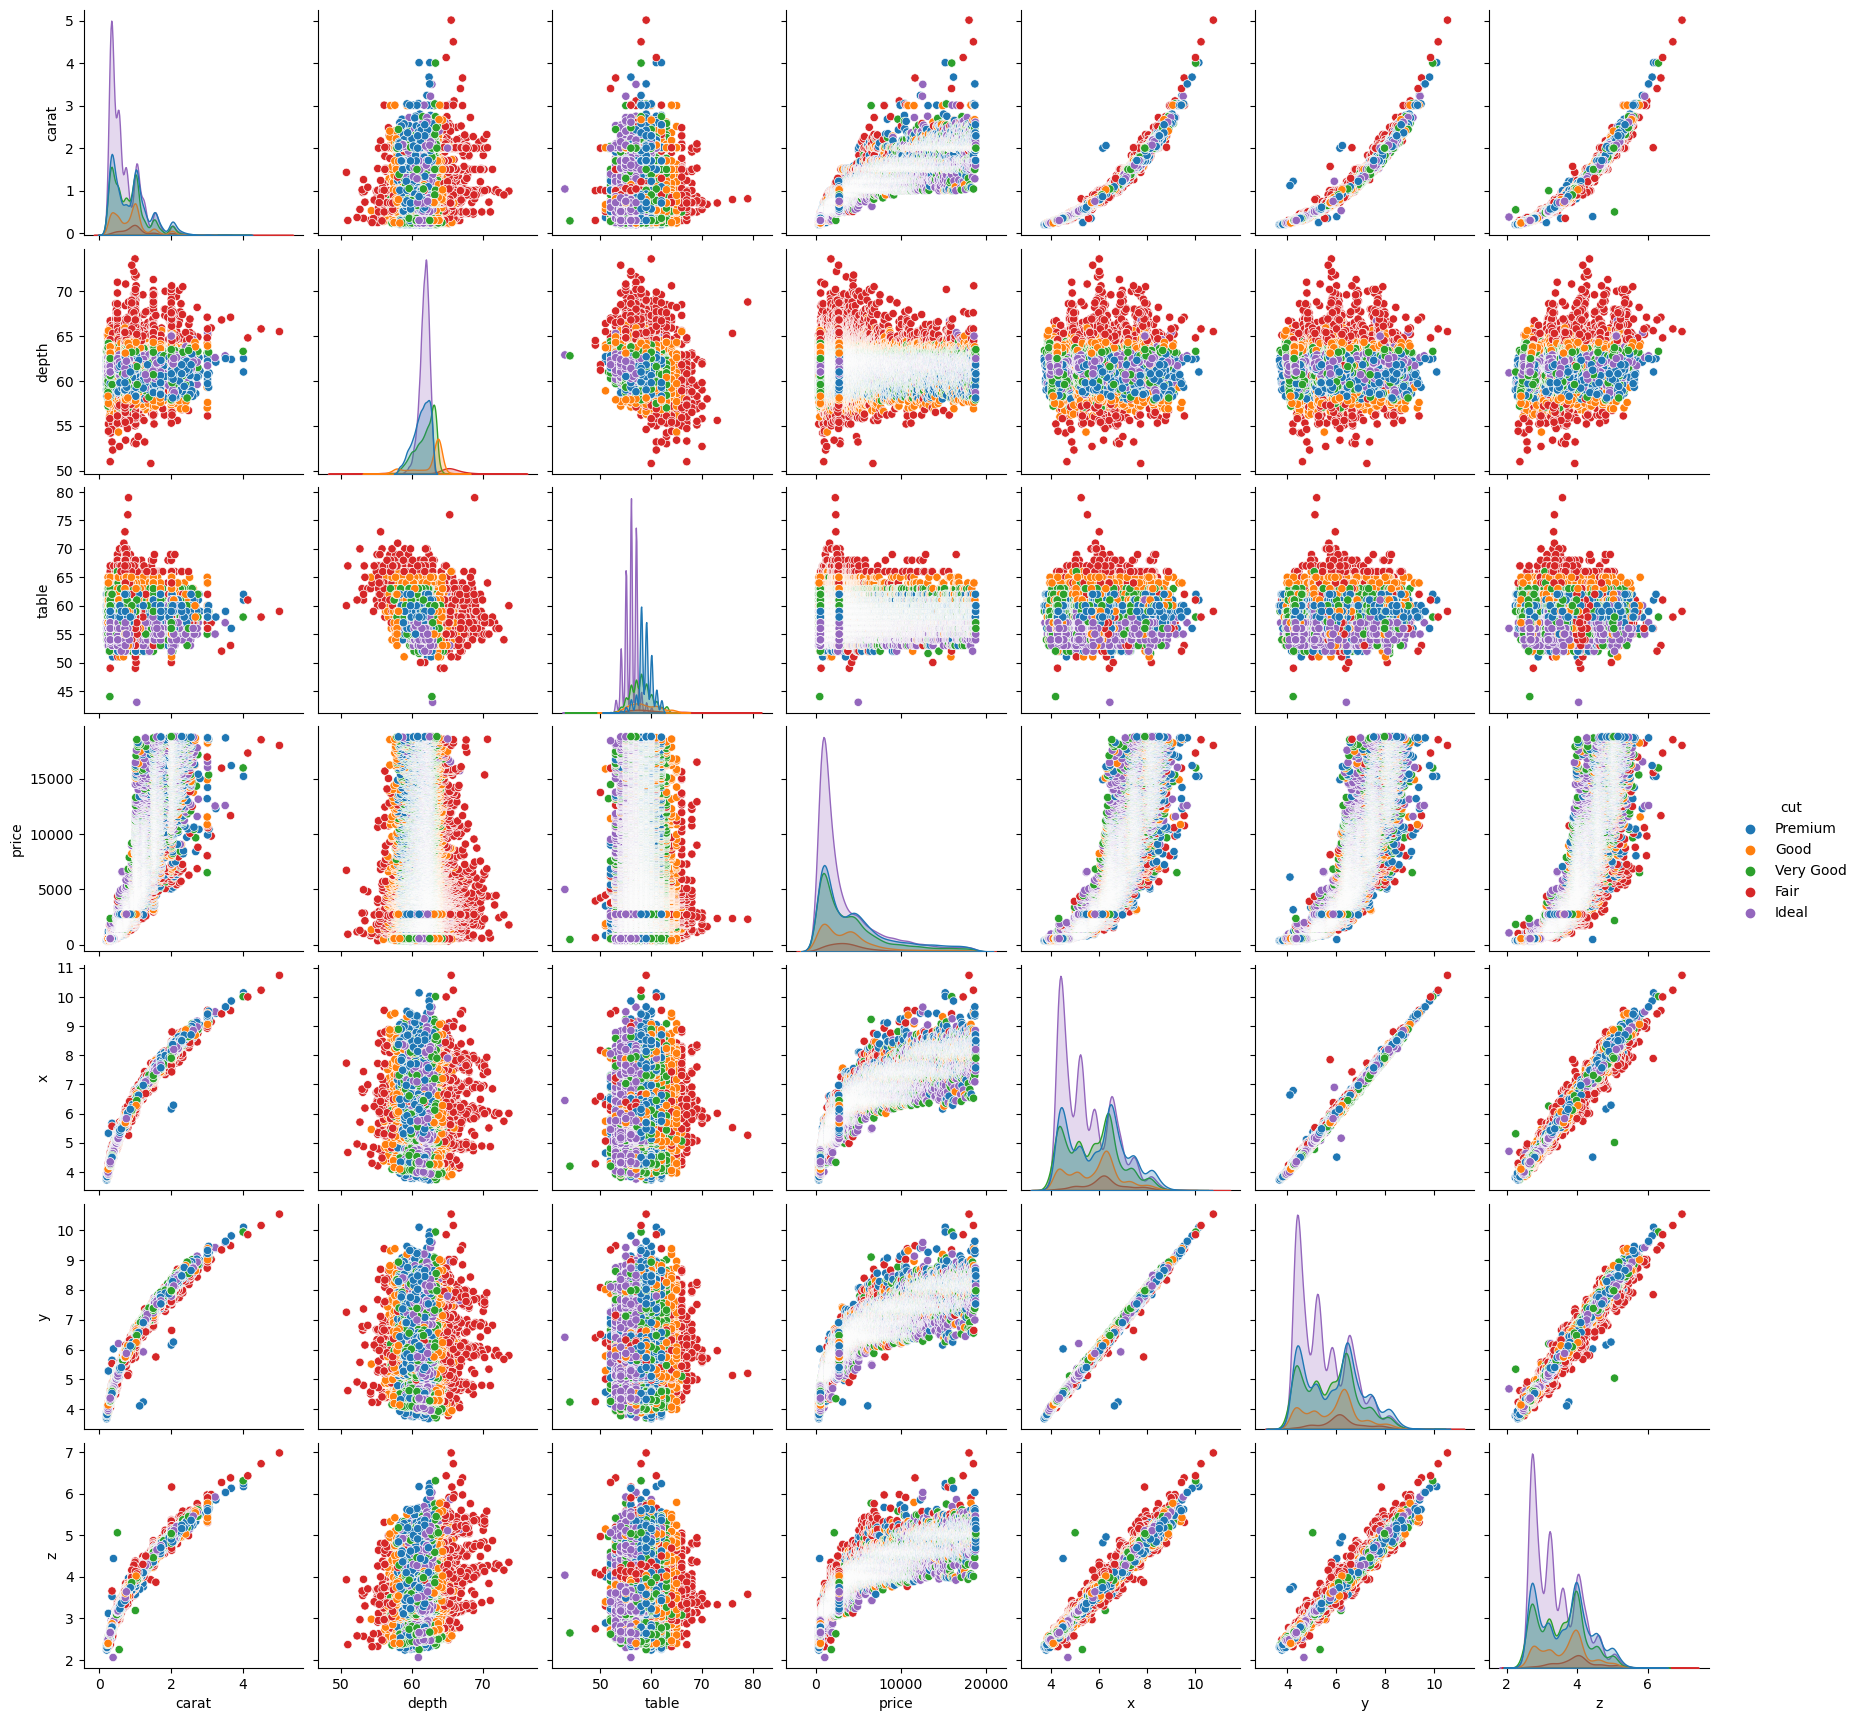

In [13]:
ax=sns.pairplot(data, hue= "cut")

In [37]:
print((data.dtypes =="int64"))

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price       True
x          False
y          False
z          False
dtype: bool


## Analysis the data

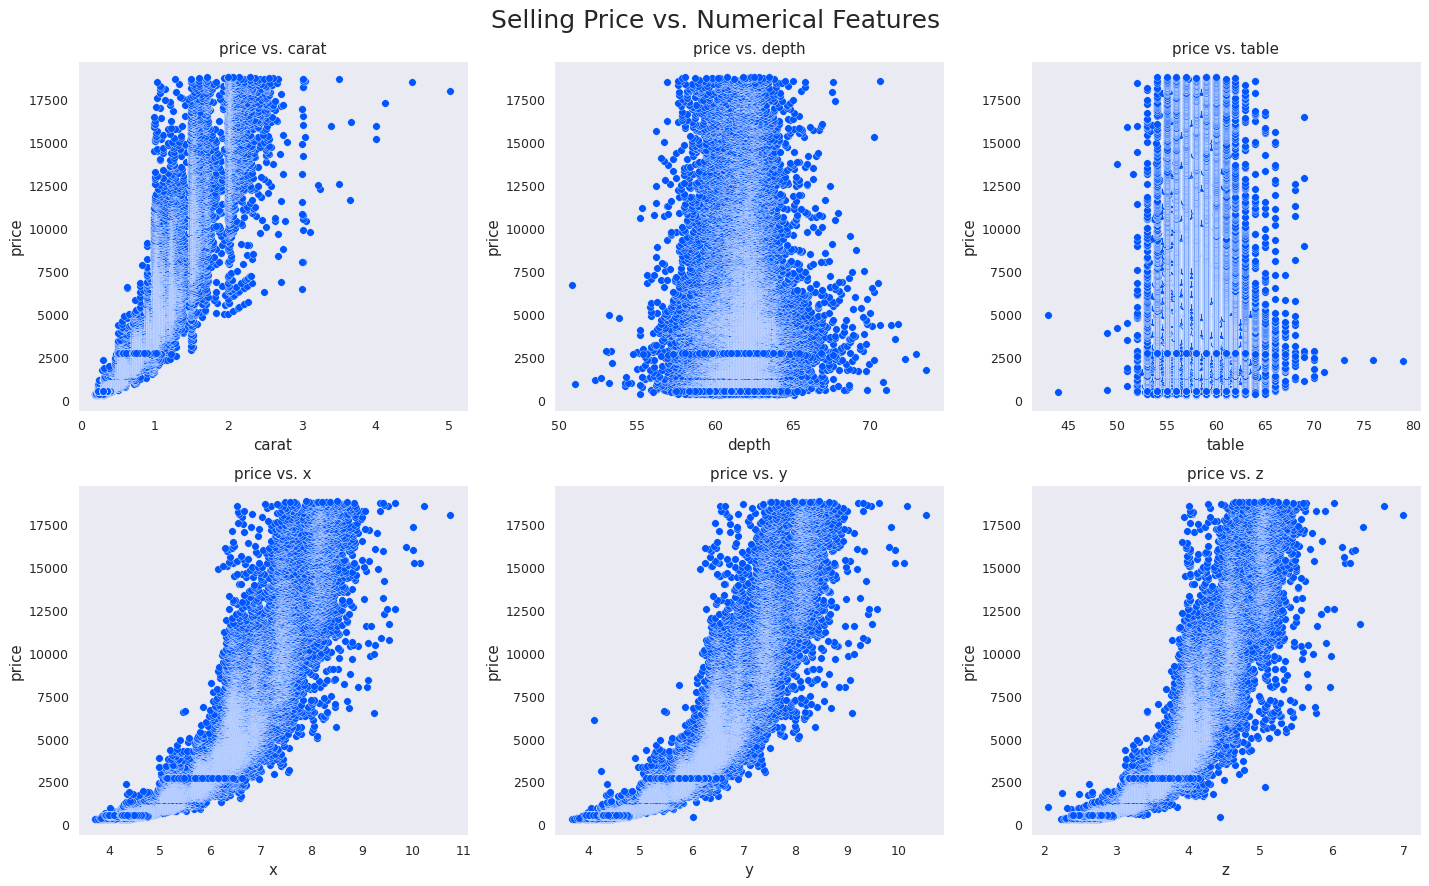

In [31]:
#Selling Price vs Numerical Features Bivariate Analysis

fig, ax = plt.subplots(nrows=2 ,ncols=3, figsize=(16,10), dpi=90)
s = (data.dtypes =="float64")
num_features = list(s[s].index)
# num_features=['depth','carat','table','x','y','z']
target = 'price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//3
    col = i%3
    ax[row,col].scatter(data[num_features[i]], data[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle(' Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

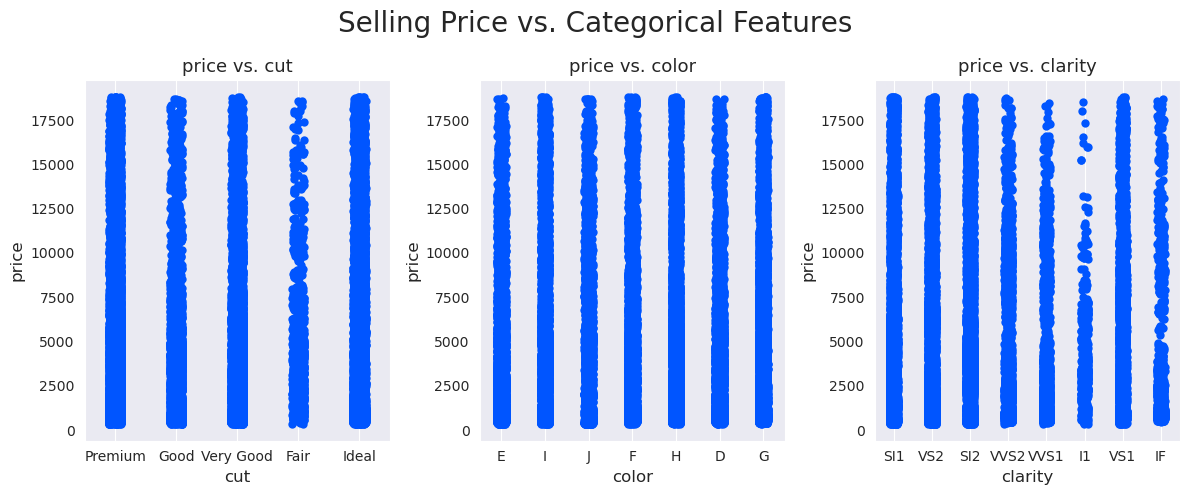

In [32]:
#Selling Price vs Categorical Features Bivariate Analysis
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
s = (data.dtypes =="object")
cat_features = list(s[s].index)
target = 'price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=data, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle(' Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

## Preprocessing the data

In [41]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)


Categorical variables:
['cut', 'color', 'clarity']


In [42]:


# Make copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()



carat  cut  color  clarity  depth  table  price     x     y     z
0   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
1   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
2   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
3   0.24    4      6        7   62.8   57.0    336  3.94  3.96  2.48
4   0.24    4      5        6   62.3   57.0    336  3.95  3.98  2.47

In [34]:
label_data.describe()

carat           cut         color       clarity         depth  \
count  42885.000000  42885.000000  42885.000000  42885.000000  42885.000000   
mean       0.796478      2.545086      2.587175      3.832506     61.745345   
std        0.480472      1.021092      1.703471      1.716878      1.418478   
min        0.200000      0.000000      0.000000      0.000000     50.800000   
25%        0.380000      2.000000      1.000000      2.000000     61.000000   
50%        0.710000      2.000000      3.000000      4.000000     61.800000   
75%        1.030000      3.000000      4.000000      5.000000     62.500000   
max        5.010000      4.000000      6.000000      7.000000     73.600000   

              table         price             x             y             z  
count  42885.000000  42885.000000  42885.000000  42885.000000  42885.000000  
mean      57.439342   3940.965093      5.724767      5.726653      3.535022  
std        2.229737   4019.604899      1.128982      1.120875      0.696862  
min       43.000000    326.000000      3.730000      3.680000      2.060000  
25%       56.000000    941.000000      4.660000      4.670000      2.870000  
50%       57.000000   2389.000000      5.710000      5.720000      3.530000  
75%       59.000000   5309.000000      6.500000      6.500000      4.020000  
max       79.000000  18823.000000     10.740000     10.540000      6.980000

<Axes: >

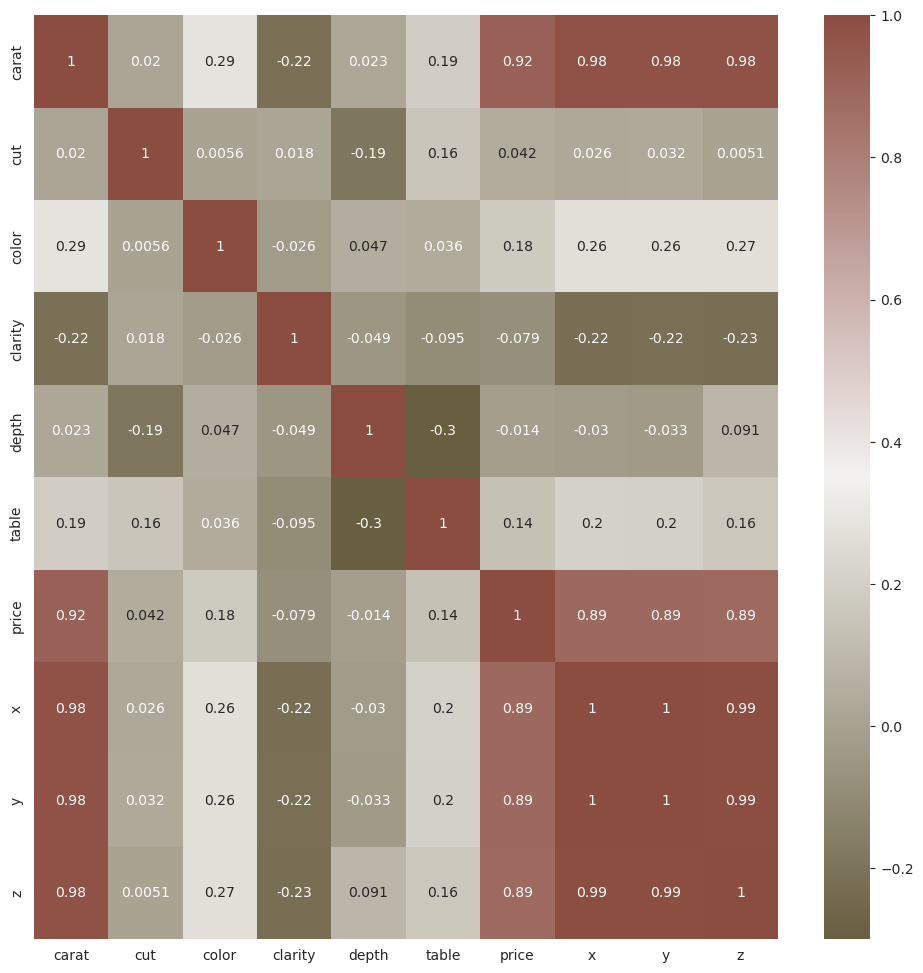

In [43]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )



## Traning machine using different algs

In [44]:


# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)


In [19]:
# print(X_train.head())
# print(y_train.head())
# print(X_test.head())
print(y_test.head())

41030    2338
2265     3284
14275    7098
30427    1000
26063     789
Name: price, dtype: int64


In [45]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_svr=Pipeline([("scalar5",StandardScaler()),
                     ("svr_classifier",SVR())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_svr
 ]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "SVRRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [50]:

# cv_results_rms = []
# for i, model in enumerate(pipelines):
#     cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
#     cv_results_rms.append(cv_score)
#     print("%s: %f " % (pipe_dict[i], cv_score.mean()))
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

cv_results_mse = []
cv_results_r2 = []
cv_results_mae = []
cv_results_rmse = []

for i, model in enumerate(pipelines):
    # Calculate the scores for each metric
    cv_score_mse = -cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10,n_jobs=-1)
    cv_score_r2 = cross_val_score(model, X_train, y_train, scoring="r2", cv=10,n_jobs=-1)
    cv_score_mae = -cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=10,n_jobs=-1)
    cv_score_rmse = -cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10,n_jobs=-1)
    
    # Append the scores to the corresponding result lists
    cv_results_mse.append(cv_score_mse)
    cv_results_r2.append(cv_score_r2)
    cv_results_mae.append(cv_score_mae)
    cv_results_rmse.append(cv_score_rmse)
    
    # Print the mean scores for each metric
    print("%s - MSE: %f, R2: %f, MAE: %f, RMSE: %f" % (pipe_dict[i], cv_score_mse.mean(), cv_score_r2.mean(), cv_score_mae.mean(), cv_score_rmse.mean()))

LinearRegression - MSE: 1807610.185249, R2: 0.888168, MAE: 852.484935, RMSE: 1343.895238
DecisionTree - MSE: 584257.403136, R2: 0.963851, MAE: 372.624210, RMSE: 773.016742
RandomForest - MSE: 319436.726216, R2: 0.980048, MAE: 278.447279, RMSE: 565.378356
KNeighbors - MSE: 738111.029042, R2: 0.954311, MAE: 430.971373, RMSE: 858.171313
SVRRegressor - MSE: 9322974.543324, R2: 0.423991, MAE: 1512.283293, RMSE: 3051.984160


In [57]:
mse_scores=[]
mae_scores=[]
r2_scores=[]
rmse_scores=[]
for i, model in enumerate(pipelines):
    mse_scores.append( cv_results_mse[i].mean())
    r2_scores.append( cv_results_r2[i].mean())
    mae_scores.append( cv_results_mae[i].mean())
    rmse_scores.append( cv_results_rmse[i].mean())
rmse_scores


[1343.8952376440402,
 773.0167416290068,
 565.3783559817277,
 858.1713130295318,
 3051.9841599404203]

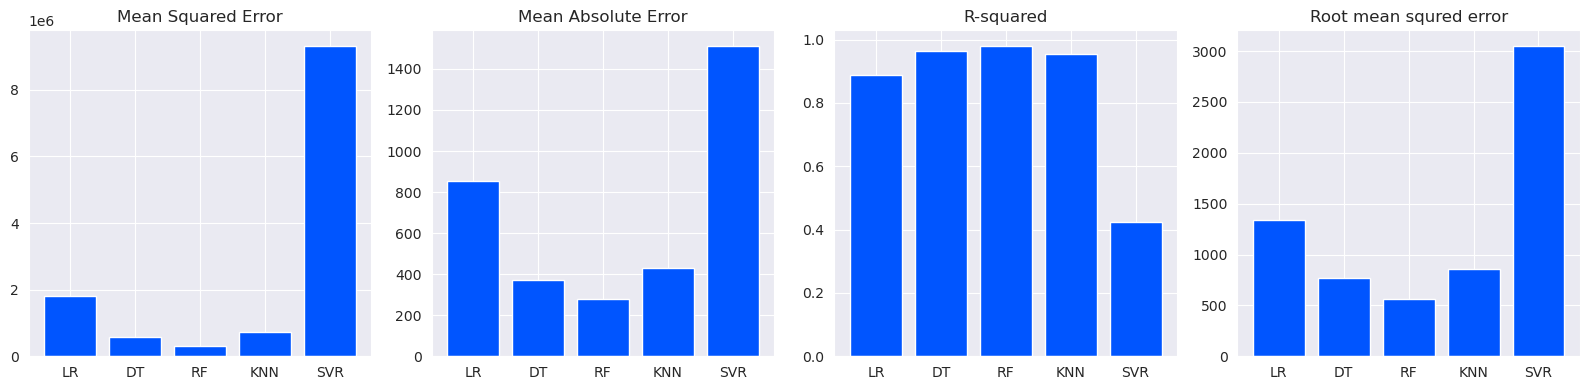

In [60]:
models = ['LR', 'DT', 'RF','KNN', 'SVR']


# Plot the evaluation metrics
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.bar(models, mse_scores)
plt.title("Mean Squared Error")
plt.subplot(1, 4, 2)
plt.bar(models, mae_scores)
plt.title("Mean Absolute Error")
plt.subplot(1, 4, 3)
plt.bar(models, r2_scores)
plt.title("R-squared")
plt.subplot(1, 4, 4)
plt.bar(models, rmse_scores)
plt.title("Root mean squred error")
plt.tight_layout()
plt.show()

## Select the best algorithm to build the model

In [63]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test)




In [74]:
# Model Evaluation
model_metrics_scores={"R^2:":metrics.r2_score(y_test, pred),
"Adjusted R^2:":1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),
"MAE":metrics.mean_absolute_error(y_test, pred),
"MSE":metrics.mean_squared_error(y_test, pred),
"RMSE":np.sqrt(metrics.mean_squared_error(y_test, pred)),}

for key, value in model_metrics_scores.items() :
    print (key, value)

R^2: 0.9796671181611788
Adjusted R^2: 0.9796500348960043
MAE 277.1065765193505
MSE 327125.46786518116
RMSE 571.9488332579945


R^2: 0.9795632415251377
Adjusted R^2: 0.9795460709849703
MAE: 277.6087673378871
MSE: 328796.6866050808
RMSE: 573.4079582680038

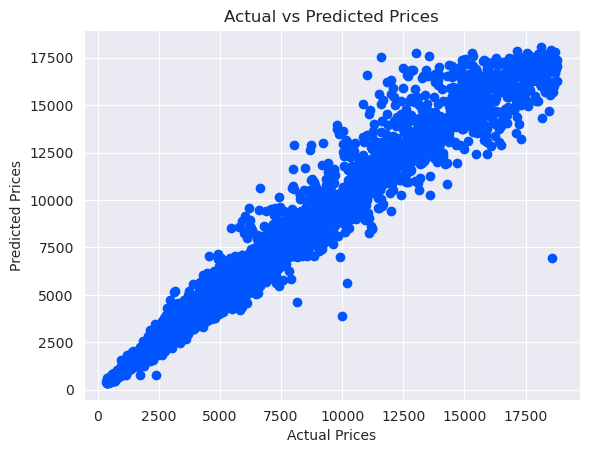

In [75]:
# Visualization
# Predicted vs Actual Prices

plt.scatter(y_test,pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()